## Homework-1
### CSC-722: Machine Learning Fundamentals
### Md Hafizur Rahman



### Problem Statement: 
Two students, Xochitl and Jimmie, play a game where each takes a turn rolling two six-side dice. Xochitl gets 1 dollar if the sum of the numbers of the two dice is a prime number (the number 1 is not prime). Jimmie gets $2 if the numbers on the two dice are the same (e.g. 1-1, 2-2, 3-3, etc). Who makes more money on average?
Write some python program and figure it out.

Importing matplotlib and seaborn for plotting, and numpy for data processing libraries on lines 1, 2, and 3. Then I setup to our plotting on lines 4 and 5. For our results are reproducible, I set a random seed for numpy on line 6.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
%matplotlib inline
np.random.seed(1738)

In [25]:
#create numpy arrays that hold the sample space for our two dice.
d1 = np.array([1, 2, 3, 4, 5, 6])
d2 = np.array([1, 2, 3, 4, 5, 6])
#hold python lists where we will store the outcomes for each of the two dice, and their sum
dice_1 = []
dice_2 = []
sums = []
#for loop, picking a random number from the sample space for each dice and appending them to their respective arrays
for _ in range(500):
    roll_1 = np.random.choice(d1)
    roll_2 = np.random.choice(d2)
    dice_1.append(roll_1)
    dice_2.append(roll_2)
    sums.append(roll_1 + roll_2)

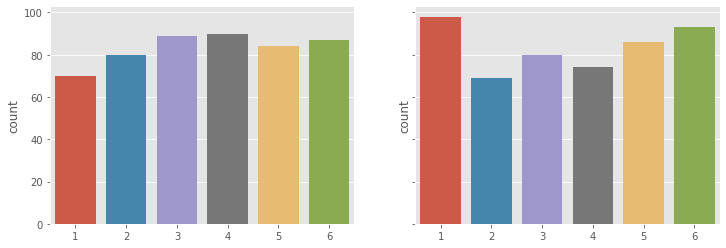

In [26]:
# plot the results: dice_1 on the left and dice_2 on the right
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4))
sns.countplot(dice_1, ax=ax1)
sns.countplot(dice_2, ax=ax2)

The 500 rolls doesn't give us consistent results for our dice rolls. Die_1 rolled 5 significantly more times than die 2, among other identifiable differences.

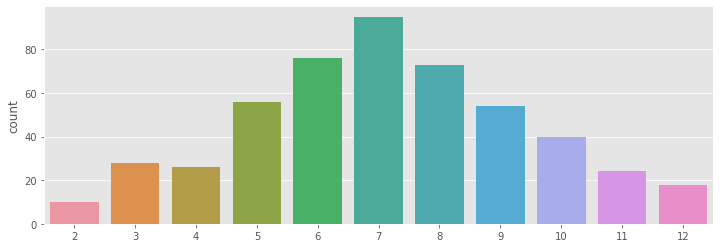

In [27]:
#Plot the sum of two results from two dies.
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(12,4))
sns.countplot(sums, ax=ax1)

we are seeing that we didn't get results consistent. We know from the probability, for any fair dice, every number is equally likely to be rolled. The main reason for that we only ran the trials 500 times. If we increase the trials number, for example, 100000. What will happen? Let see that in the following code:

In [28]:
#create numpy arrays that hold the sample space for our two dice.
d1 = np.array([1, 2, 3, 4, 5, 6])
d2 = np.array([1, 2, 3, 4, 5, 6])
#hold python lists where we will store the outcomes for each of the two dice, and their sum
dice_1 = []
dice_2 = []
sums = []
#for loop, picking a random number from the sample space for each dice and appending them to their respective arrays
for _ in range(100000):
    roll_1 = np.random.choice(d1)
    roll_2 = np.random.choice(d2)
    dice_1.append(roll_1)
    dice_2.append(roll_2)
    sums.append(roll_1 + roll_2)

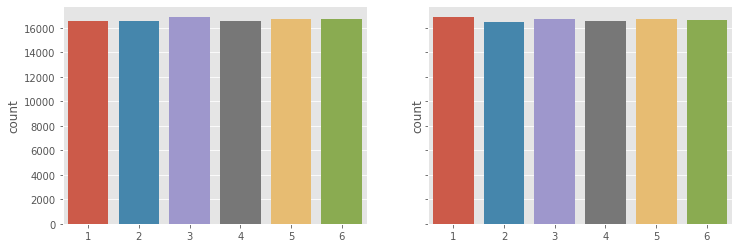

In [29]:
# plot the results: dice_1 on the left and dice_2 on the right
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,4))
sns.countplot(dice_1, ax=ax1)
sns.countplot(dice_2, ax=ax2)

Now we are seeing our outcomes converge to their expected values. This is due to the law of large numbers, which states that as the number of samples increases, their respective probabilities converge to their true probabilities.

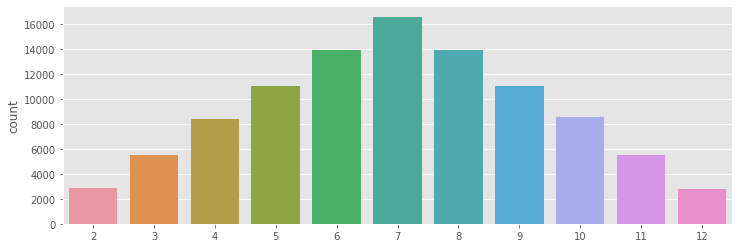

In [30]:
#Plot the sum of two results from two dies.
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(12,4))
sns.countplot(sums, ax=ax1)

These values have also converged towards their expected outcomes, though the difference isn't as stark.

Now, we can see the percentages that we generated in above graph. Though we determined this experimentally, it's easy to validate our answer theoretically. The following code will give us the percentage values of each possible outcome [sum of two dies]. In theory, the possible combinations of two dice rolls as shown in below table: 

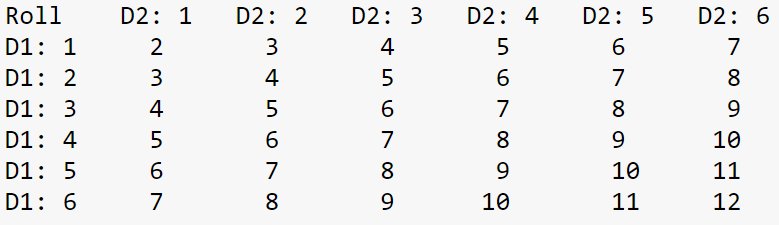

From the table, we can see that the total outcome is 36 and for the number 7, the total outcome of 7 is 6. The probability of 7 is (6/36)*100%=16.67%. 

In [32]:
#Total possible outcome[sum of two dies] is 14 which will start from 0 and end to 13.
outcomes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#for loop to count each outcome
for n in sums:
  outcomes[n] += 1

#calculate the percentage of the each outcome
percs = [f'{round((count/sum(outcomes))*100, 2)}%' for count in outcomes ]

#print the calculated percentage of the each outcome
for i, val in enumerate(percs):
  print(f'{i}: {val}')


0: 0.0%
1: 0.0%
2: 2.87%
3: 5.53%
4: 8.35%
5: 11.03%
6: 13.9%
7: 16.56%
8: 13.92%
9: 11.02%
10: 8.52%
11: 5.54%
12: 2.76%
13: 0.0%


From the above output, we can see that the probability of 7 is 16.56% which is almost equal to the theory result. 

Let's return to the problem statement which is stated at the beginning of the file. we have to calculate who will earn more money. In our problem, we have two condition for each people. First, the sum of the numbers of the two dice is a prime number (Xochitl), second, the numbers on the two dice are the same (e.g. 1-1, 2-2, 3-3, etc)(Jimmie). For calculation we write the following code:

In [34]:
#the possible prime number for two dies
prime_numbers = [2, 3, 5, 7, 11]
#variable for same dies
same = 0
#variable for prime number
primes = 0
for i in range(len(dice_1)):
     # if two dies are the same this statement will execute
    if dice_1[i] == dice_2[i]:
        same += 1
    #if the sum of two dies is prime this statement will execute
    if sums[i] in prime_numbers:
        primes += 1
        
#print the final probability results  for both conditions 
same_perc = same / len(dice_1)    
print(same_perc*100) 
prime_perc = primes / len(dice_1)
print(prime_perc*100) 


16.794
41.526


Xochitl will earn 41.426*1= 41.426% and Jimmie will earn 16.794*2=35.588%. We are seeing that Xochitl will earn more money than Jimmie, even though Jimmie will get 2 dollars for each game.

For the code please click the following link:


https://github.com/hafizurr/Machine_Learnig_course/blob/master/home_work/homework_1.ipynb